# Clase 03 - Mapas y redes

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

En esta clase expanderemos aún más nuestro repertorio de visualizaciones aprendiendo a trabajas con mapas y redes. Para los datos geográficos trabajaremos con el paquete `geopandas`, el cual tiene algunos requerimientos extras que deben ser instalados, y los datos de redes usaremos `networkx`.

## Mapas

Importamos los paquetes estándar para comenzar a trabajar en visualización de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Para mapas y datos geográficos usaremos [geopandas](https://geopandas.org/en/stable/index.html), paquete que extiende los tipos de datos que puede cargar `pandas` para poder ejecutar operaciones espaciales en datos de tipo geométricos.

In [2]:
import geopandas as gpd

Para cargar datos geográficos ocupamos la función `read_file` de geopandas. En cuanto a formato de los datos, usualmente los podemos encontrar ya sea en shapefile (`.shp`) o geojson (`.geojson` o simplemente `.json`). Para este ejemplo usaremos datos de la Región Metropolitana.

In [3]:
rm = gpd.read_file('../data/RM/LIMITE_URBANO_CENSAL_C17.shp')
rm.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,CAPITAL COMUNAL,CIUDAD,0.146714,0.000531,"POLYGON ((-70.73797 -33.79851, -70.73738 -33.7..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,HUELQUÉN,URBANO,PUEBLO,0.167916,0.000205,"POLYGON ((-70.64840 -33.81521, -70.64859 -33.8..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,HOSPITAL,URBANO,CIUDAD,0.139694,0.000445,"POLYGON ((-70.76468 -33.84349, -70.76448 -33.8..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PINTUÉ - LA GUACHERA,URBANO,PUEBLO,0.148207,0.000292,"POLYGON ((-70.87824 -33.86540, -70.87839 -33.8..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,EL TRÁNSITO,URBANO,PUEBLO,0.073625,0.000066,"POLYGON ((-70.65834 -33.78357, -70.65832 -33.7..."


Como `geopandas` es básicamente una extensión de `pandas`, los dataframe cargados tiene funciones y métodos similares. Usemos, por ejemplo, el `.plot`.

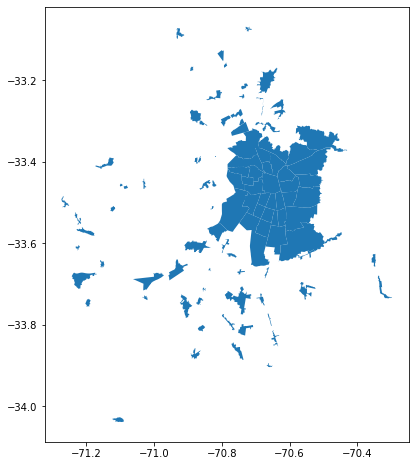

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

rm.plot(ax=ax)

plt.show()

Probemos graficando sólo las provincias.

In [5]:
provincias = rm.dissolve(by='NOM_PROVIN')
provincias.head()

,geometry,REGION,NOM_REGION,PROVINCIA,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area
NOM_PROVIN,,,,,,,,,,,
CHACABUCO,"MULTIPOLYGON (((-70.72213 -33.31743, -70.72077...",13,REGIÓN METROPOLITANA DE SANTIAGO,133,13301,COLINA,COLINA,CAPITAL PROVINCIAL,CIUDAD,0.302769,0.001673
CORDILLERA,"MULTIPOLYGON (((-70.56203 -33.69582, -70.56203...",13,REGIÓN METROPOLITANA DE SANTIAGO,132,13201,PUENTE ALTO,PUENTE ALTO,CAPITAL PROVINCIAL,CIUDAD,0.477213,0.007370
MAIPO,"MULTIPOLYGON (((-70.87840 -33.86654, -70.87840...",13,REGIÓN METROPOLITANA DE SANTIAGO,134,13404,PAINE,PAINE,CAPITAL COMUNAL,CIUDAD,0.146714,0.000531
MELIPILLA,"MULTIPOLYGON (((-71.18781 -33.73890, -71.18747...",13,REGIÓN METROPOLITANA DE SANTIAGO,135,13504,MARÍA PINTO,MARÍA PINTO,CAPITAL COMUNAL,PUEBLO,0.046109,0.000112
SANTIAGO,"MULTIPOLYGON (((-70.66331 -33.58525, -70.66331...",13,REGIÓN METROPOLITANA DE SANTIAGO,131,13124,PUDAHUEL,LO AGUIRRE,URBANO,PUEBLO,0.048678,0.000102


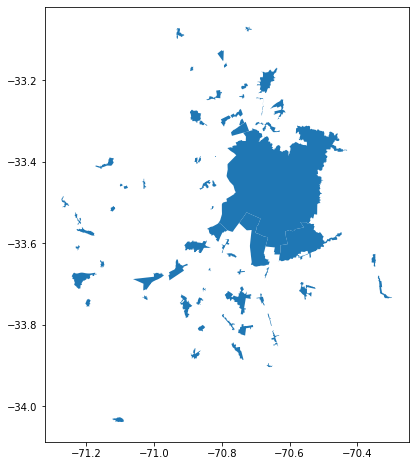

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

provincias.plot(ax=ax)

plt.show()

Y las comunas.

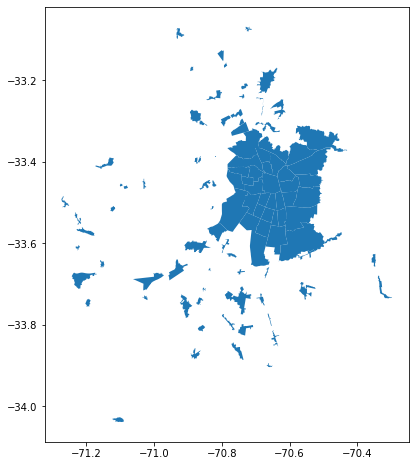

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

rm.dissolve(by='NOM_COMUNA').plot(ax=ax)

plt.show()

Ahora carguemos más datos. ¿Se acuerdan de los datos de la Encuesta Origen Destino que usamos la clase pasada?  Bueno, carguemos la geografía para esos datos.

In [8]:
zonas_eod = gpd.read_file('../data/EOD2012/Zonificacion_EOD2012.shp')
zonas_eod.head()

,ID,AREA,Zona,Com,Comuna,geometry
0,103,837.7500,103.0,13105,El Bosque,"POLYGON ((346376.693 6286027.029, 346366.556 6..."
1,104,998.8125,104.0,13105,El Bosque,"POLYGON ((344151.235 6285465.040, 344263.705 6..."
2,106,286.2500,106.0,13105,El Bosque,"POLYGON ((344415.434 6285878.048, 344263.705 6..."
3,115,857.4375,115.0,13105,El Bosque,"POLYGON ((344415.434 6285878.048, 344412.704 6..."
4,116,853.9375,116.0,13105,El Bosque,"POLYGON ((345133.421 6286261.983, 345243.965 6..."


Y grafiquémosla

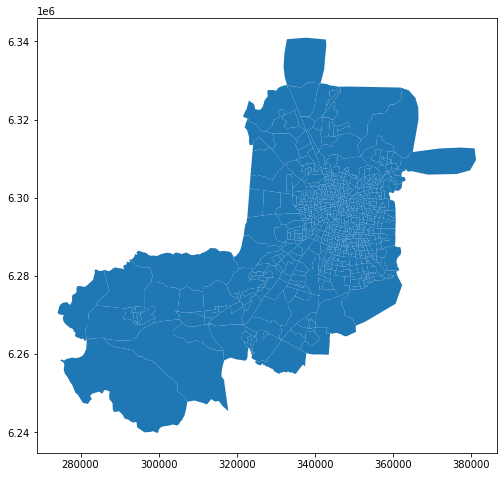

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

zonas_eod.plot(ax=ax)

plt.show()

Y comparemos ambos datos

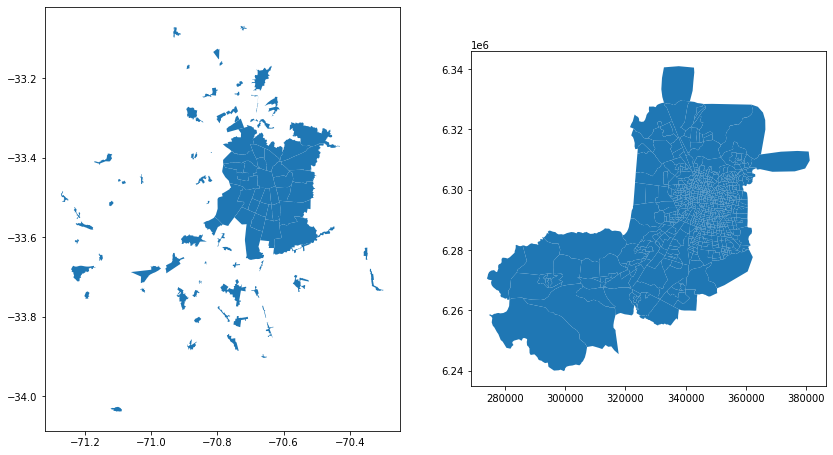

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,8))

rm.plot(ax=ax[0])
zonas_eod.plot(ax=ax[1])

plt.show()

Carguemos los mismos datos de la semana pasada, que tienen la información de los viajes de las personas encuestadas

In [11]:
viajes_persona = pd.read_csv('https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/eod_processed.csv')
viajes_persona = viajes_persona[pd.notnull(viajes_persona['PesoLaboral'])]
viajes_persona.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral
0,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,400,407,335208.7188,...,0,0,2,81067.0,1,120000,0,789356,76.81028,142.337500
1,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,407,400,338812.2813,...,0,0,2,81067.0,1,120000,0,789356,76.81028,142.337500
2,173441,17344101,2,Maipú,Las Condes,Poniente,Oriente,407,307,338536.4375,...,0,0,2,57000.0,0,140000,0,633883,76.81028,127.328613
3,173441,17344101,2,Las Condes,Maipú,Oriente,Poniente,307,407,354267.3438,...,0,0,2,57000.0,0,140000,0,633883,76.81028,127.328613
4,173441,17344103,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,338536.4375,...,0,0,2,57000.0,0,140000,0,633883,76.81028,116.697351


Filtremos sólo las zonas que están presentes en los datos de viajes y probemos intersectándolas con los datos de la Región Metropolitana

<ipython-input-12-20e02b1472e0>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32719
Right CRS: EPSG:4674

  zonas_urbanas = gpd.overlay(zonas_con_viajes, rm, how='intersection')
/Users/fbecerra/Library/Python/3.8/lib/python/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

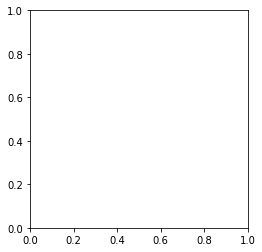

In [12]:
zonas_con_viajes = zonas_eod[zonas_eod.ID.isin(viajes_persona.ZonaOrigen.unique())
                           & zonas_eod.ID.isin(viajes_persona.ZonaDestino.unique())]
zonas_urbanas = gpd.overlay(zonas_con_viajes, rm, how='intersection')
zonas_urbanas.plot()

El problema aquí es el sistema de coordenadas en que están los datos

In [13]:
print(rm.crs)
print(zonas_con_viajes.crs)

epsg:4674
epsg:32719


Debemos mezclarlas actualizando el CRS de uno de los datos.

<AxesSubplot:>

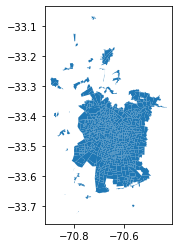

In [14]:
zonas_urbanas = gpd.overlay(zonas_con_viajes.to_crs(rm.crs), rm, how='intersection')
zonas_urbanas.plot()

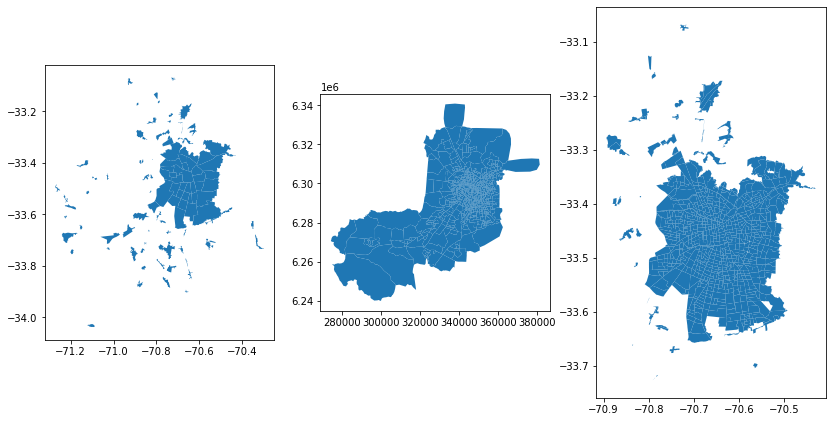

In [15]:
fig, ax = plt.subplots(1,3, figsize=(14,8))

rm.plot(ax=ax[0])
zonas_eod.plot(ax=ax[1])
zonas_urbanas.plot(ax=ax[2])

plt.show()

Una última transformación para poder trabajar con los datos

In [16]:
zonas_urbanas = zonas_urbanas[~zonas_urbanas.Comuna.isin(['Pirque', 'Calera de Tango', 'Lampa', 'Colina'])]
zonas_urbanas = zonas_urbanas.set_index('ID')
zonas_urbanas.head()

,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
ID,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.65497 -33.55493, -70.65492 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.67767 -33.55753, -70.67599 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.67767 -33.55753, -70.67891 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.67602 -33.55525, -70.67625 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,"POLYGON ((-70.66701 -33.55231, -70.66564 -33.5..."


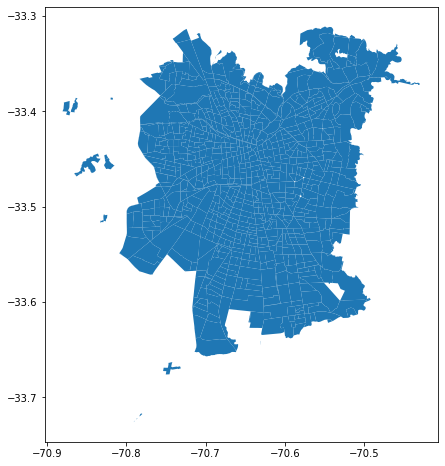

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

zonas_urbanas.plot(ax=ax)

plt.show()

### Choropleth

Para hacer un chroropleth vamos a asignarle a cada zona un valor. En nuestro ejemplo, este valor será la distancia que recorren la gente de esa comuna en su viaje hacia el trabajo. Para trabajar con los datos de viajes, primero debemos transformarlos a un GeoDataFrame.

In [18]:
origenes_viajes = gpd.GeoDataFrame(viajes_persona,
                                  geometry=gpd.points_from_xy(viajes_persona['OrigenCoordX'], viajes_persona['OrigenCoordY']),
                                  crs=zonas_eod.crs)
origenes_viajes.head()


,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry
0,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,400,407,335208.7188,...,0,2,81067.0,1,120000,0,789356,76.81028,142.337500,POINT (335208.719 6288387.000)
1,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,407,400,338812.2813,...,0,2,81067.0,1,120000,0,789356,76.81028,142.337500,POINT (338812.281 6292391.000)
2,173441,17344101,2,Maipú,Las Condes,Poniente,Oriente,407,307,338536.4375,...,0,2,57000.0,0,140000,0,633883,76.81028,127.328613,POINT (338536.438 6291928.000)
3,173441,17344101,2,Las Condes,Maipú,Oriente,Poniente,307,407,354267.3438,...,0,2,57000.0,0,140000,0,633883,76.81028,127.328613,POINT (354267.344 6302297.000)
4,173441,17344103,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,338536.4375,...,0,2,57000.0,0,140000,0,633883,76.81028,116.697351,POINT (338536.438 6291928.000)


Para calcular la distancia de la comuna de origen, tomaremos un promedio ponderado del atributo `DistEuclidiana` (que ya viene en los datos) de cada viaje.

In [19]:
def weighted_mean(df, value='DistEuclidiana', weight='PesoLaboral'):
    weighted_sum = (df[value] * df[weight]).sum()
    return weighted_sum / df[weight].sum()


viajes_trabajo = viajes_persona[(viajes_persona.PropositoAgregado == 'Trabajo') &
                                (pd.notnull(viajes_persona.PesoLaboral))]
distancia_zonas = viajes_trabajo.groupby(['ZonaOrigen']).apply(weighted_mean)
distancia_zonas.name = 'distancia_al_trabajo'

In [20]:
viajes_trabajo.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral,geometry
2,173441,17344101,2,Maipú,Las Condes,Poniente,Oriente,407,307,338536.4375,...,0,2,57000.0,0,140000,0,633883,76.810280,127.328613,POINT (338536.438 6291928.000)
4,173441,17344103,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,338536.4375,...,0,2,57000.0,0,140000,0,633883,76.810280,116.697351,POINT (338536.438 6291928.000)
9,173462,17346201,1,Maipú,Maipú,Poniente,Poniente,398,398,336246.9063,...,0,2,179854.0,1,230000,0,1359063,81.022255,138.548016,POINT (336246.906 6293101.000)
16,173462,17346206,2,Maipú,Pudahuel,Poniente,Poniente,398,537,334334.0938,...,0,2,179854.0,1,230000,0,1359063,81.022255,168.399300,POINT (334334.094 6292455.000)
20,173471,17347102,1,Maipú,Santiago,Poniente,Centro,398,7,334265.3750,...,0,1,NaN,0,240000,0,1233727,64.768684,74.339590,POINT (334265.375 6292613.000)


In [21]:
distancia_zonas

ZonaOrigen
1       6245.037170
2       5952.584070
3       7476.621070
4       4731.477408
5      10901.184351
           ...     
798    10481.323392
799     8598.123555
800     4329.383595
801    14431.040329
803    15296.390919
Name: distancia_al_trabajo, Length: 722, dtype: float64

Analizamos como es la distribución de distancia.

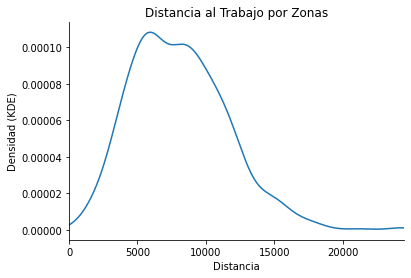

In [22]:
distancia_zonas.plot(kind='kde')

plt.xlim([0, distancia_zonas.max()])
plt.title('Distancia al Trabajo por Zonas')
plt.xlabel('Distancia')
plt.ylabel('Densidad (KDE)')

sns.despine()

Con los datos ya calculados ahora podemos graficar el mapa con los colores correspondientes a la distancia al trabajo.

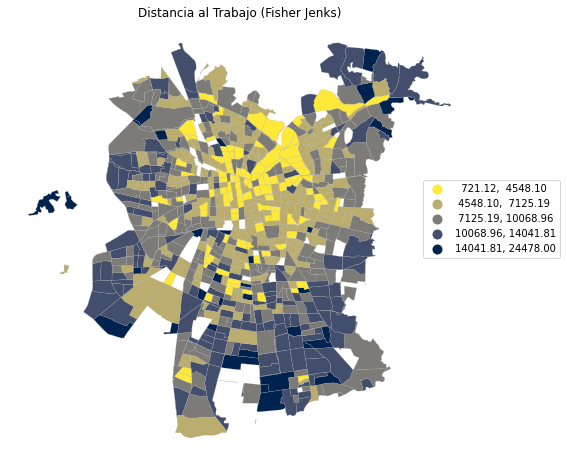

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

zonas_urbanas.join(distancia_zonas, how='inner').plot(ax=ax,
                                                      column='distancia_al_trabajo',
                                                      k=5,
                                                      scheme='Fisher_Jenks',
                                                      cmap='cividis_r',
                                                      edgecolors='#abacab',
                                                      linewidth=0.2,
                                                      legend=True)

plt.title('Distancia al Trabajo (Fisher Jenks)')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
ax.set_axis_off()

plt.show()

### Puntos

Ahora probaremos una variante del mapa anterior usando puntos para cada viaje. Para eso, usaremos su lugar de origen, de la misma forma que en el anterior. Para eso, primero debemos filtrar sólo los viajes que se realizan en el área urbana de la RM y sólo aquellos que son de trabajo.

In [24]:
origenes_urbanos = gpd.sjoin(origenes_viajes.to_crs(zonas_urbanas.crs), 
                            zonas_urbanas, 
                            predicate='within', lsuffix='_l', rsuffix='_r')
origenes_a_graficar = origenes_urbanos[origenes_urbanos.PropositoAgregado == 'Trabajo']

Y lo graficamos, igual que el anterior

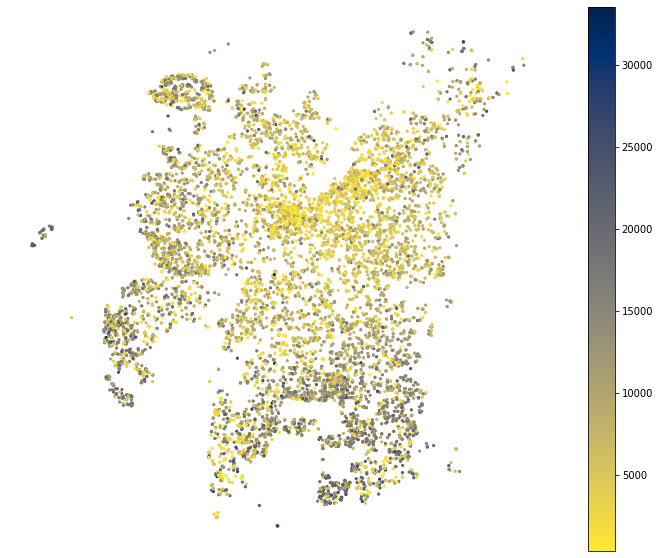

In [25]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

origenes_a_graficar.plot(column='DistEuclidiana',
                        ax=ax,
                        marker='.',
                        markersize=20,
                        cmap='cividis_r',
                        legend=True)

ax.set_axis_off()

Podemos agregarle el mapa de la RM de fondo para darle más contexto.

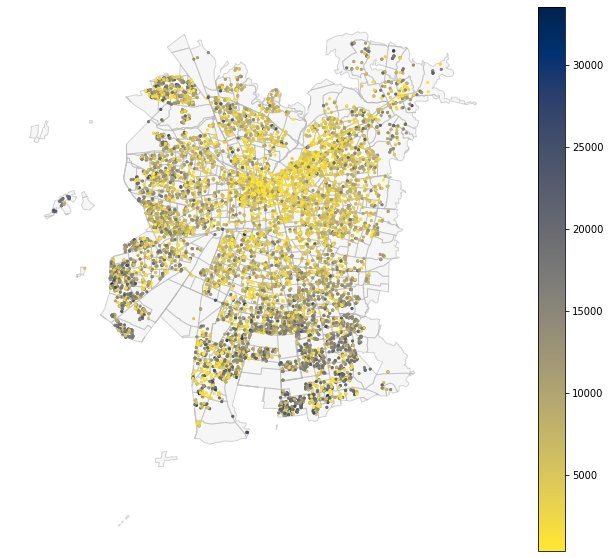

In [26]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)

origenes_a_graficar.plot(column='DistEuclidiana',
                        ax=ax,
                        marker='.',
                        markersize=20,
                        cmap='cividis_r',
                        legend=True)

ax.set_axis_off()

Y podemos comparar ambos mapas.

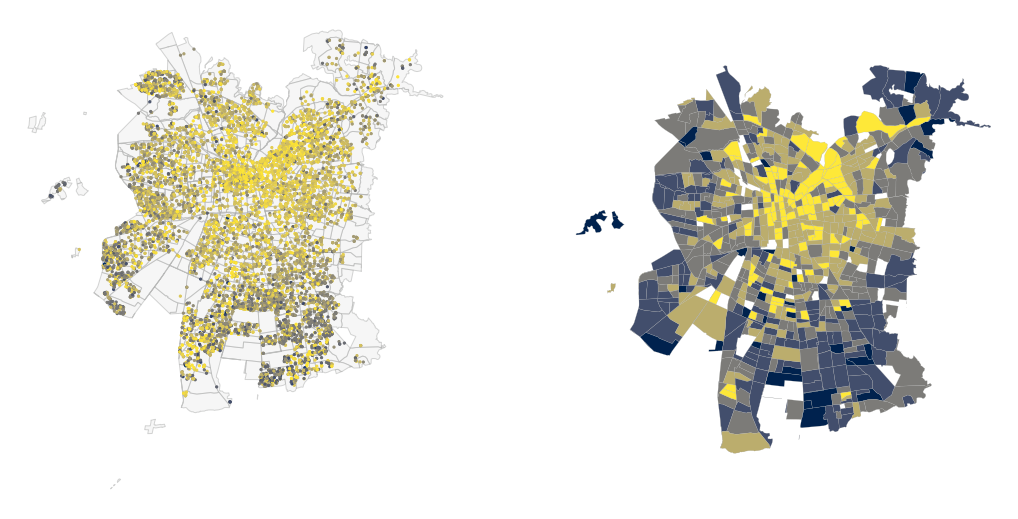

In [27]:
fig, ax = plt.subplots(1,2, figsize=(18,12))

zonas_urbanas.plot(ax=ax[0], color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)

origenes_a_graficar.plot(column='DistEuclidiana',
                        ax=ax[0],
                        marker='.',
                        markersize=20,
                        cmap='cividis_r',
                        legend=False)

zonas_urbanas.join(distancia_zonas, how='inner').plot(ax=ax[1],
                                                      column='distancia_al_trabajo',
                                                      k=5,
                                                      scheme='Fisher_Jenks',
                                                      cmap='cividis_r',
                                                      edgecolors='#abacab',
                                                      linewidth=0.2,
                                                      legend=False)

ax[0].set_axis_off()
ax[1].set_axis_off()

### Heatmap

Para graficar un heatmap sobre un mapa, ocuparemos una función especial que calcule el mapa de calor primero, y después lo sobrepondremos al mapa geográfico.

In [28]:
from KDEpy import FFTKDE

def build_heatmap_data(trips):
    # hacemos una lista con las coordenadas de los viajes
    point_coords = np.vstack([trips.geometry.x, trips.geometry.y]).T
    # instanciamos la Fast-Fourier Transform Kernel Density Estimation
    kde = FFTKDE(bw=1e-2, norm=2, kernel='cosine')
    # La variable grid_points define la cantidad de puntos en el espacio en el que se estimará la densidad
    grid_points = 2**6  
    # ajustamos la distribución.
    # ¡Noten que el parámetro weights recibe el factor de expansión!
    grid, points = kde.fit(point_coords, weights=trips['PesoLaboral'].values).evaluate(grid_points)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(grid_points, grid_points).T
    return x, y, z

Creamos el mapa de calor y probamos como se ve.

<AxesSubplot:>

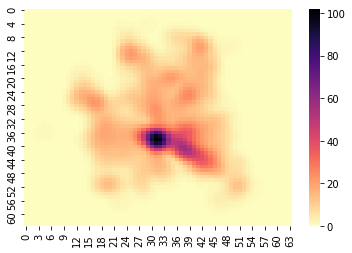

In [29]:
test_heatmap = build_heatmap_data(origenes_urbanos)
sns.heatmap(test_heatmap[2], cmap='magma_r')

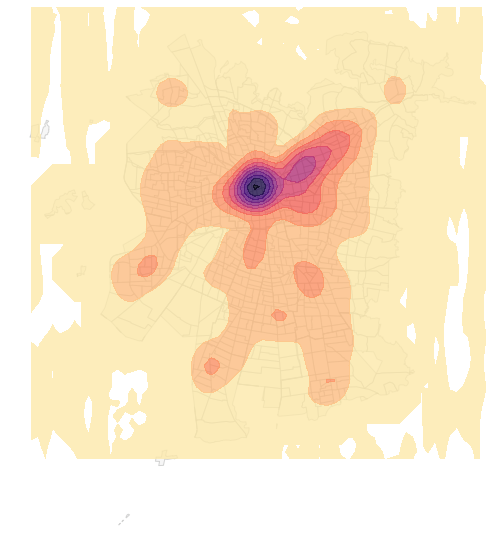

In [30]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)

n_levels = 10
ax.contourf(test_heatmap[0], test_heatmap[1], test_heatmap[2], n_levels, alpha=0.8, cmap='magma_r')

ax.set_axis_off()

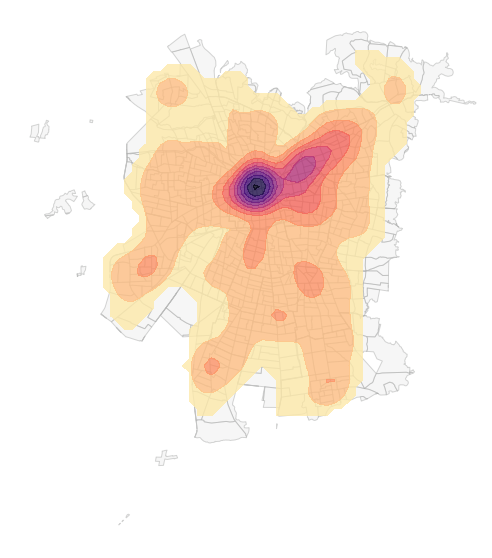

In [31]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

zonas_urbanas.plot(ax=ax, color='#efefef', edgecolor='#abacab', linewidth=1, alpha=0.5)

n_levels = 10
masked_z = np.ma.array(test_heatmap[2], mask=test_heatmap[2] < 2.5)
ax.contourf(test_heatmap[0], test_heatmap[1], masked_z, n_levels, alpha=0.8, cmap='magma_r')

ax.set_axis_off()

### Redes

Primero, importamos [networkx](https://networkx.org/documentation/stable/index.html), que es el paquete que nos facilitará la vida al momento de graficar redes.

In [32]:
import networkx as nx

Cargamos los datos, que son las interacciones de los personajes de la novela Les Miserables.

In [33]:
ls = pd.read_csv('https://raw.githubusercontent.com/graphistry/pygraphistry/master/demos/data/lesmiserables.csv')
ls.head()

,source,target,value
0,Napoleon,Myriel,1
1,Mlle.Baptistine,Myriel,8
2,Mme.Magloire,Myriel,10
3,Mme.Magloire,Mlle.Baptistine,6
4,CountessdeLo,Myriel,1


Creamos la read a partir de esos datos.

In [34]:
network = nx.from_pandas_edgelist(ls)

Y la dibujamos

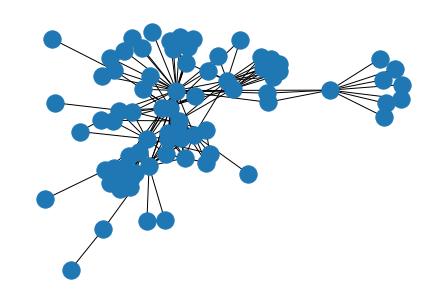

In [35]:
nx.draw(network)

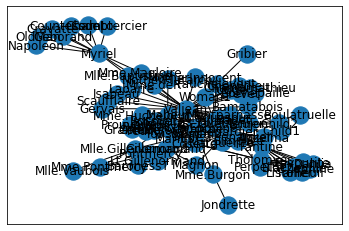

In [36]:
nx.draw_networkx(network)

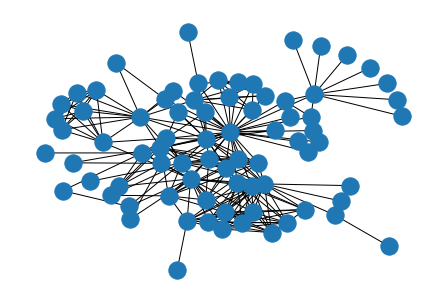

In [37]:
nx.draw_kamada_kawai(network)

También se puede graficar de forma circular. Para eso primero calculamos las posiciones de los nodes y edges a parte.

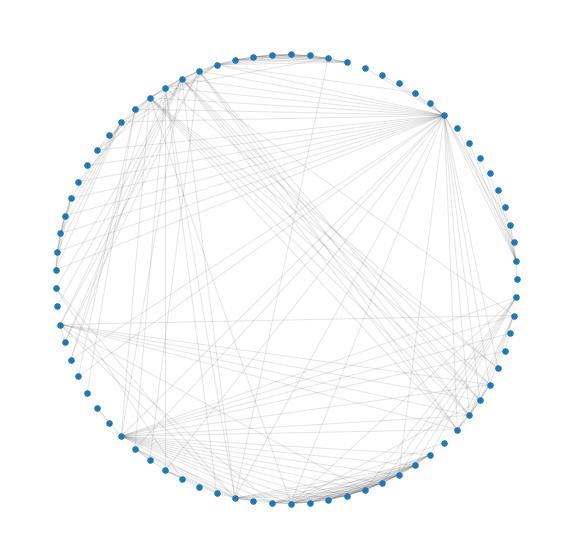

In [38]:
positions = nx.circular_layout(network)

fig, ax = plt.subplots(1,1, figsize=(10,10))

nx.draw_networkx_nodes(network, pos=positions, ax=ax, node_size=30)
nx.draw_networkx_edges(network, pos=positions, ax=ax, alpha=0.1)

ax.set_axis_off()

De vuelta a la EOD. Filtremos los viajes que se realizan en el área urbana y creemos una matriz similar a la anterior de Los Miserables, pero usando zonas de origen y destino de los viajes.

In [39]:
viajes_urbanos = viajes_trabajo[viajes_trabajo.ZonaOrigen.isin(zonas_urbanas.index) & 
                                viajes_trabajo.ZonaDestino.isin(zonas_urbanas.index)].copy()

matrices = (viajes_urbanos[pd.notnull(viajes_urbanos.PesoLaboral)]
    .groupby(['ZonaOrigen', 'ZonaDestino'])
    .agg(n_viajes=('PesoLaboral', 'sum'))
           )
matrices

n_viajes
ZonaOrigen ZonaDestino            
1          4            100.769253
           5            113.892111
           12            99.704488
           14           529.804720
           18           430.802098
...                            ...
781        765          223.154848
           766          746.538983
           768          424.303390
           770          183.168512
           771          171.987181

[9322 rows x 1 columns]

Las posiciones de las zonas ya están calculadas, asi que ocupamos las coordenadas de los `centroid` de los polígonos.

In [40]:
centroids = zonas_urbanas.centroid
centroids.head()

<ipython-input-40-e1c6a12560ce>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = zonas_urbanas.centroid


ID
103    POINT (-70.65851 -33.55806)
104    POINT (-70.67185 -33.55424)
106    POINT (-70.68875 -33.56184)
115    POINT (-70.67869 -33.55099)
116    POINT (-70.66524 -33.55684)
dtype: geometry

In [41]:
node_positions = dict(zip(centroids.index, zip(centroids.x, centroids.y)))
node_positions

{103: (-70.65850985562453, -33.55806091004628),
 104: (-70.67184772275115, -33.55424485447532),
 106: (-70.69511047825131, -33.557864034733726),
 115: (-70.678689968841, -33.5509934738534),
 116: (-70.66523781763193, -33.556835200093325),
 664: (-70.65345962785304, -33.54854461132195),
 779: (-70.70041485813893, -33.55675377587943),
 252: (-70.64435108593133, -33.57005449275822),
 257: (-70.64958223369025, -33.59168108745165),
 261: (-70.65090408959824, -33.55934740769254),
 758: (-70.70944988291245, -33.58269547477046),
 109: (-70.67833226450244, -33.56695053820302),
 110: (-70.67559979330127, -33.562142502525624),
 118: (-70.68318655180832, -33.57685372138775),
 119: (-70.68058703588048, -33.57189340340928),
 762: (-70.68537908905888, -33.58209967457457),
 763: (-70.66573534170767, -33.59297851281353),
 108: (-70.69852114592626, -33.567936499801746),
 759: (-70.69965016518569, -33.57979672458478),
 780: (-70.70580624828983, -33.57008669813991),
 111: (-70.66008353630977, -33.57379271

Creamos un gráfico de redes a partir de esos datos, de la misma forma que lo hicimos con los otros datos.

In [42]:
graph_matrix = matrices[(matrices.n_viajes >= matrices.n_viajes.quantile(0.95))].reset_index()
graph = nx.from_pandas_edgelist(graph_matrix,
                               source='ZonaOrigen',
                               target='ZonaDestino',
                               edge_attr='n_viajes',
                               create_using=nx.DiGraph())

Y finalmente lo graficamos sobre el mapa.

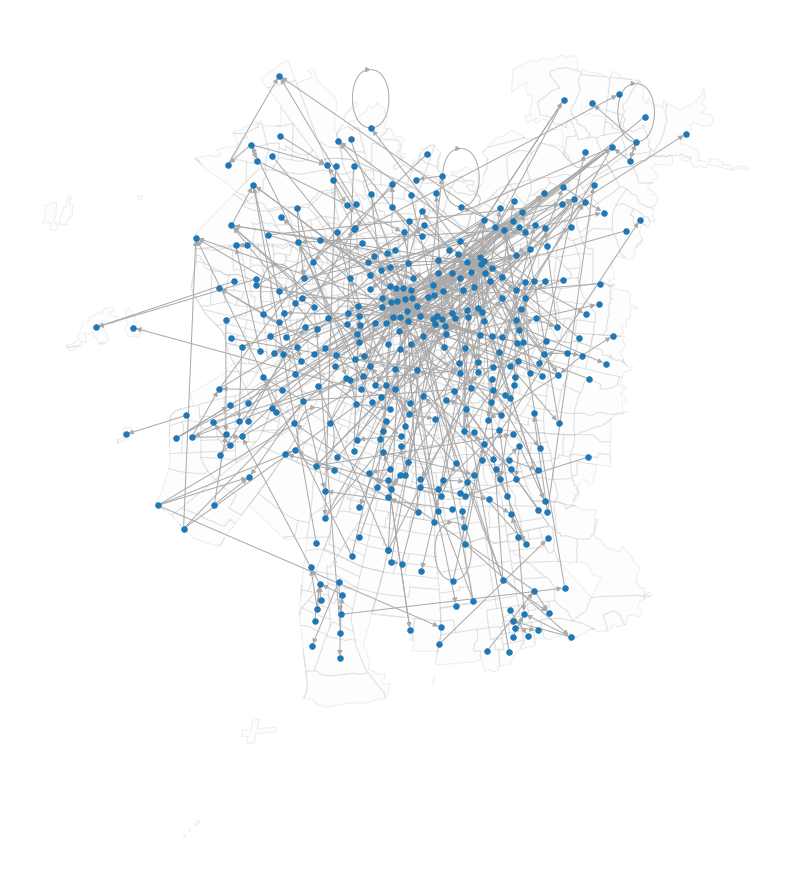

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))

zonas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='#666666', alpha=0.1)
nx.draw(graph, ax=ax, pos=node_positions, node_size=30, edge_color='darkgray')

ax.set_axis_off()

Además podemos usar distintos anchos para los edges, dependiendo del número de viajes realizados de una zona a otra.

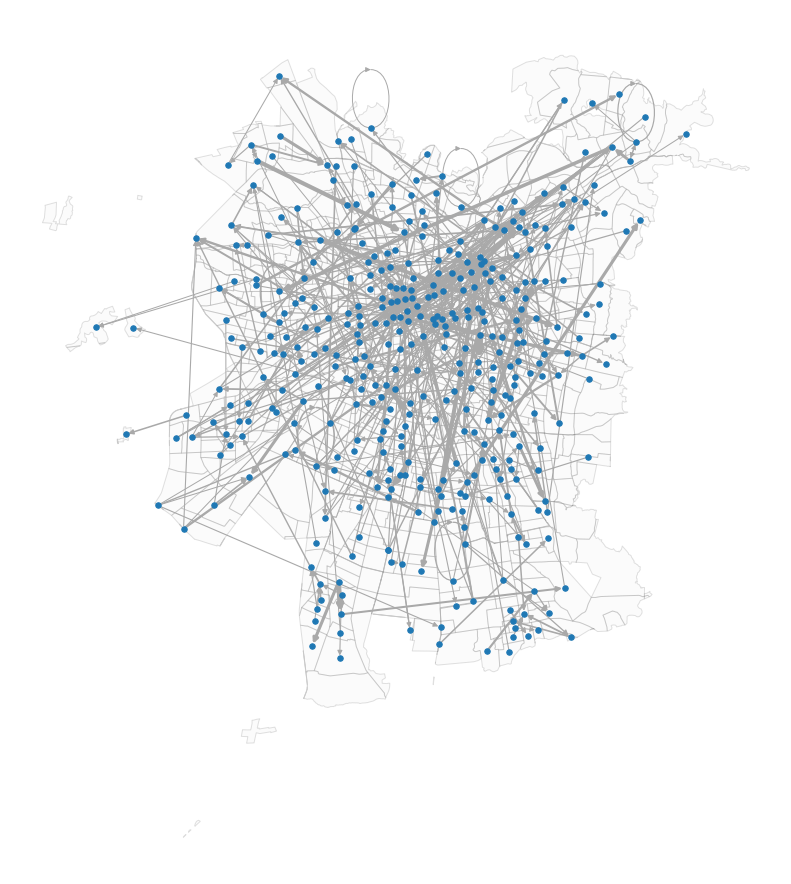

In [44]:
edge_width = graph_matrix['n_viajes'] / graph_matrix['n_viajes'].max() * 7

fig, ax = plt.subplots(1, 1, figsize=(16,16))

zonas_urbanas.plot(ax=ax, facecolor='#efefef', edgecolor='#666666', alpha=0.2)
nx.draw_networkx(graph, ax=ax, pos=node_positions, node_size=30, edge_color='darkgray',
                 width=edge_width, with_labels=False)

ax.set_axis_off()